In [39]:
import yfinance as yf

# Define a list of ticker symbols for different companies
tickers = ['AAPL', 'MSFT', 'GOOGL']

# Specify the time period for which you want historical data
start_date = '2023-01-01'
end_date = '2024-01-01'

# Fetch historical stock market data for the specified tickers and time period
data = yf.download(tickers, start=start_date, end=end_date)

# Inspect the fetched data
print(data.head())

[*********************100%%**********************]  3 of 3 completed

Price        Adj Close                              Close             \
Ticker            AAPL      GOOGL        MSFT        AAPL      GOOGL   
Date                                                                   
2023-01-03  124.216293  89.120003  237.036011  125.070000  89.120003   
2023-01-04  125.497498  88.080002  226.667297  126.360001  88.080002   
2023-01-05  124.166634  86.199997  219.949356  125.019997  86.199997   
2023-01-06  128.735229  87.339996  222.541550  129.619995  87.339996   
2023-01-09  129.261612  88.019997  224.708313  130.149994  88.019997   

Price                         High                                Low  \
Ticker            MSFT        AAPL      GOOGL        MSFT        AAPL   
Date                                                                    
2023-01-03  239.580002  130.899994  91.050003  245.750000  124.169998   
2023-01-04  229.100006  128.660004  90.650002  232.869995  125.080002   
2023-01-05  222.309998  127.769997  87.570000  227.550003 

In [40]:
# Check for missing values
missing_values = df.isna().sum()

In [41]:
# Drop rows with missing values
df.dropna(inplace=True)

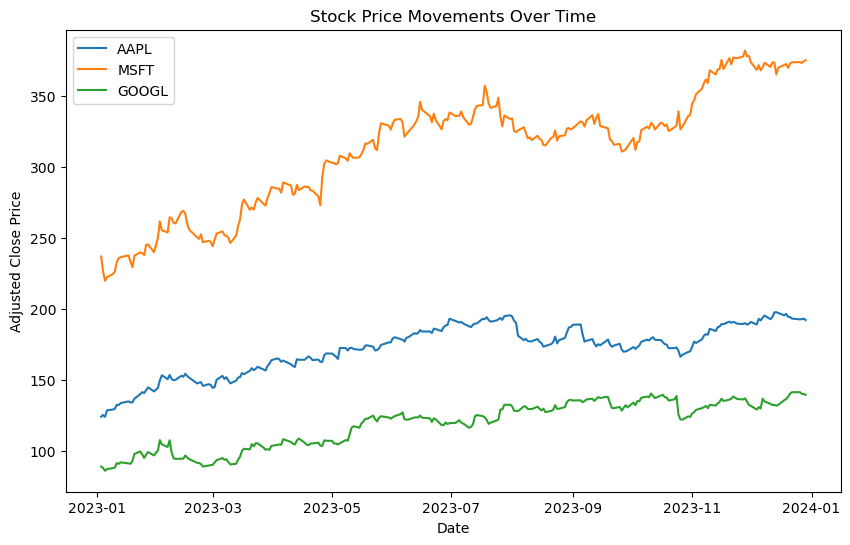

In [44]:
import matplotlib.pyplot as plt

# Plot stock price movements over time
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(df.index, df['Adj Close'][ticker], label=ticker)

plt.title('Stock Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

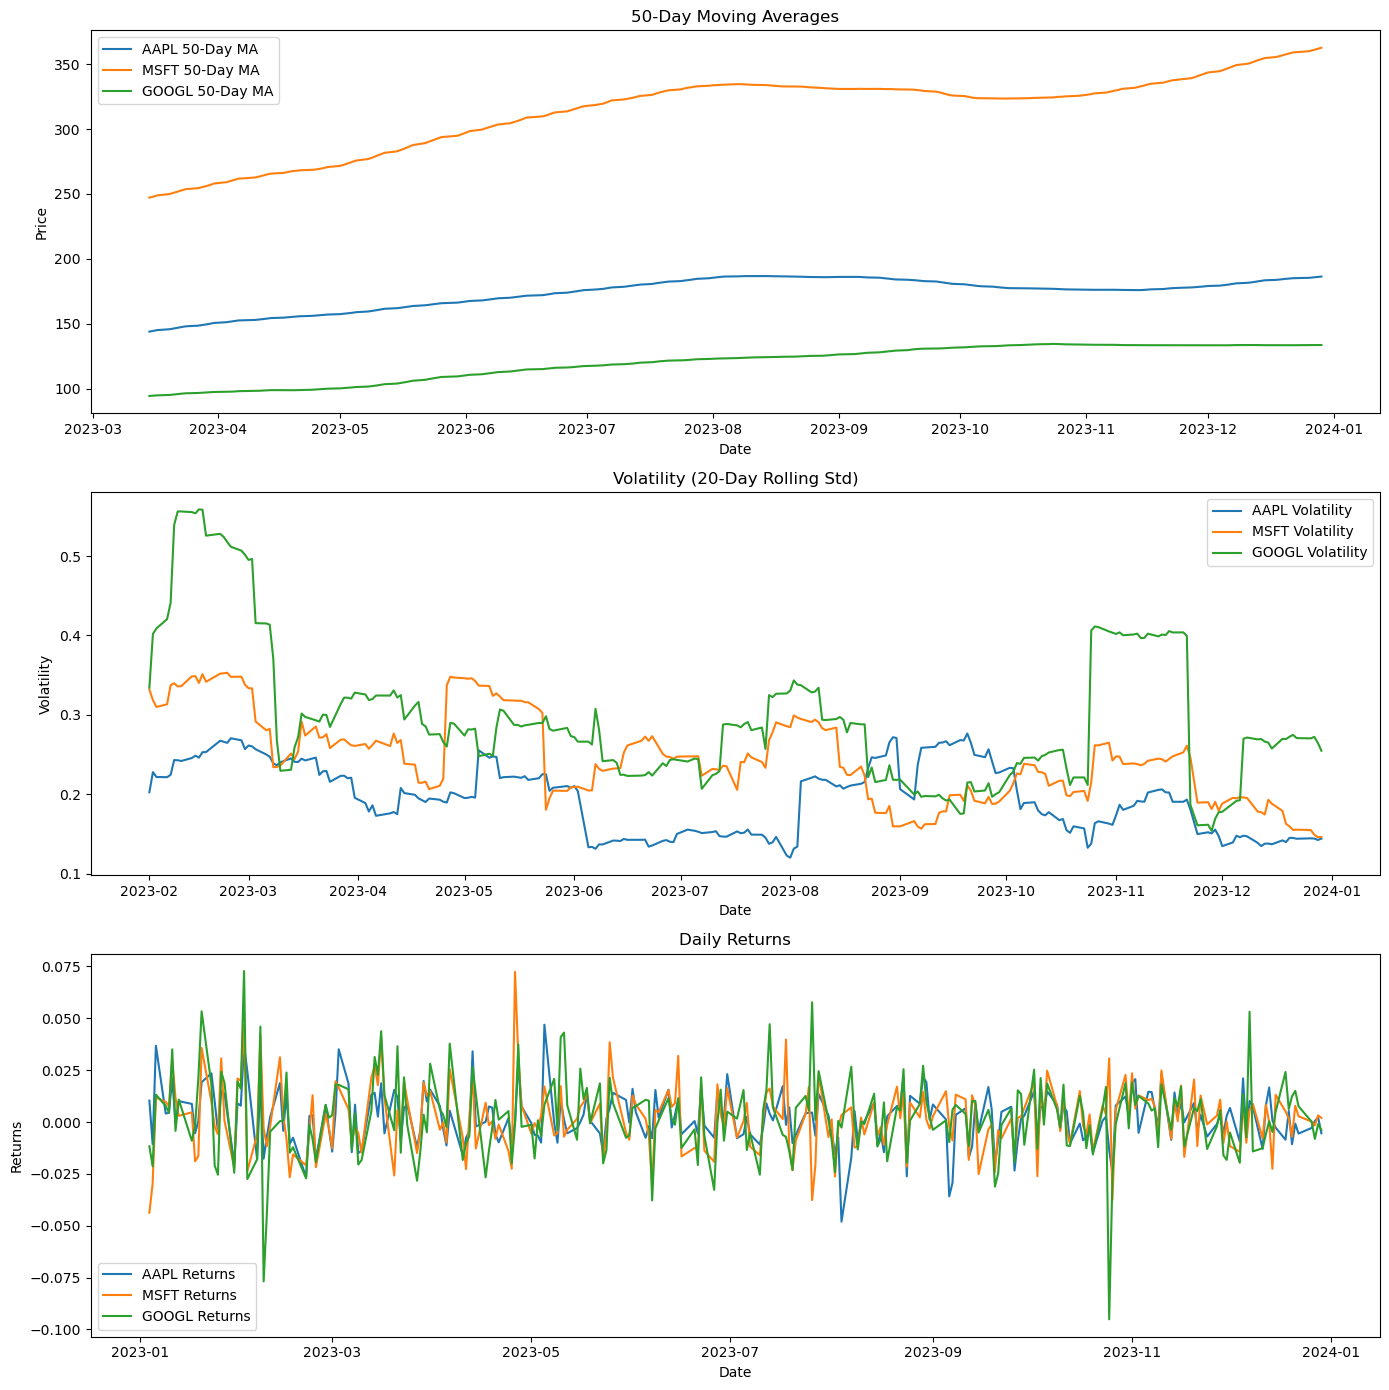

In [78]:
# Calculate Moving Averages
data['AAPL_MA_50'] = data['Adj Close']['AAPL'].rolling(window=50).mean()
data['MSFT_MA_50'] = data['Adj Close']['MSFT'].rolling(window=50).mean()
data['GOOGL_MA_50'] = data['Adj Close']['GOOGL'].rolling(window=50).mean()

# Calculate Volatility (using standard deviation of daily returns)
data['AAPL_Volatility'] = data['Adj Close']['AAPL'].pct_change().rolling(window=20).std() * (252 ** 0.5)
data['MSFT_Volatility'] = data['Adj Close']['MSFT'].pct_change().rolling(window=20).std() * (252 ** 0.5)
data['GOOGL_Volatility'] = data['Adj Close']['GOOGL'].pct_change().rolling(window=20).std() * (252 ** 0.5)

# Calculate Daily Returns
data['AAPL_Returns'] = data['Adj Close']['AAPL'].pct_change()
data['MSFT_Returns'] = data['Adj Close']['MSFT'].pct_change()
data['GOOGL_Returns'] = data['Adj Close']['GOOGL'].pct_change()

# Plotting
plt.figure(figsize=(14, 14))  # Increase overall figure size

# Plot Moving Averages
plt.subplot(3, 1, 1)
for ticker in tickers:
    plt.plot(data.index, data[f'{ticker}_MA_50'], label=f'{ticker} 50-Day MA')
plt.title('50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Plot Volatility
plt.subplot(3, 1, 2)
for ticker in tickers:
    plt.plot(data.index, data[f'{ticker}_Volatility'], label=f'{ticker} Volatility')
plt.title('Volatility (20-Day Rolling Std)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()

# Plot Daily Returns
plt.subplot(3, 1, 3)
for ticker in tickers:
    plt.plot(data.index, data[f'{ticker}_Returns'], label=f'{ticker} Returns')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()

plt.tight_layout()
plt.show()